In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices, dmatrix

In [2]:
df = pd.read_csv('wo_men.csv')

In [5]:
df['sex','height']

KeyError: ('sex', 'height')

In [ ]:
y, X = dmatrices('height ~ shoe_size + sex', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif[vif['VIF Factor'] > 10])

   VIF Factor   features
0   77.304599  Intercept


In [ ]:
model = smf.ols('height ~ shoe_size + sex',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     21.46
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.92e-08
Time:                        15:03:24   Log-Likelihood:                -491.51
No. Observations:                 100   AIC:                             989.0
Df Residuals:                      97   BIC:                             996.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.3339     29.449      0.385      0.701     -47.113      69.781
sex[T.woman]    -2.1658      9.302     -0.233      0.816     -20.627      16.296
shoe_size        3.9139      0.646      6.055      0.000       2.631       5.197
==============================================================================
Omnibus:                      123.462   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1805.948
Skew:                          -4.478   Prob(JB):                         0.00
Kurtosis:                      21.794   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

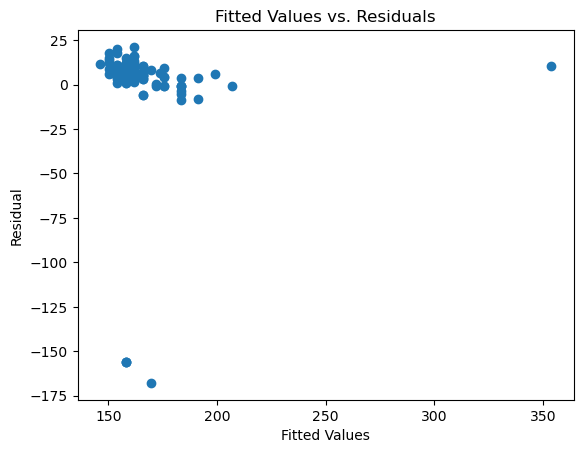

In [ ]:
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [ ]:
infl = model.get_influence()
n = len(df)
p = model.df_model + 1

In [ ]:
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n

In [ ]:
print(df.index[:-1][atyp_cook])

Int64Index([47, 61, 67, 77, 80], dtype='int64')


In [ ]:
df_trim = df.drop(df.index[:-1][atyp_cook])

In [ ]:
df_trim

,time,sex,height,shoe_size
0,04.10.2016 17:58:51,woman,160.0,40.0
1,04.10.2016 17:58:59,woman,171.0,39.0
2,04.10.2016 18:00:15,woman,174.0,39.0
3,04.10.2016 18:01:17,woman,176.0,40.0
4,04.10.2016 18:01:22,man,195.0,46.0
...,...,...,...,...
96,17.10.2016 12:37:09,woman,170.0,39.0
97,17.10.2016 13:12:48,woman,183.0,39.0
98,19.10.2016 17:07:53,woman,173.0,40.0
99,29.10.2016 20:28:33,woman,160.0,37.0


In [ ]:
model_t = smf.ols('height ~ shoe_size + sex',df_trim).fit()
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.14e-28
Time:                        15:10:56   Log-Likelihood:                -282.55
No. Observations:                  95   AIC:                             571.1
Df Residuals:                      92   BIC:                             578.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.7874     13.868      3.085      0.003      15.245      70.330
sex[T.woman]     1.9165      2.180      0.879      0.382      -2.413       6.246
shoe_size        3.1972      0.315     10.153      0.000       2.572       3.823
==============================================================================
Omnibus:                        1.421   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.883
Skew:                           0.077   Prob(JB):                        0.643
Kurtosis:                       3.447   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

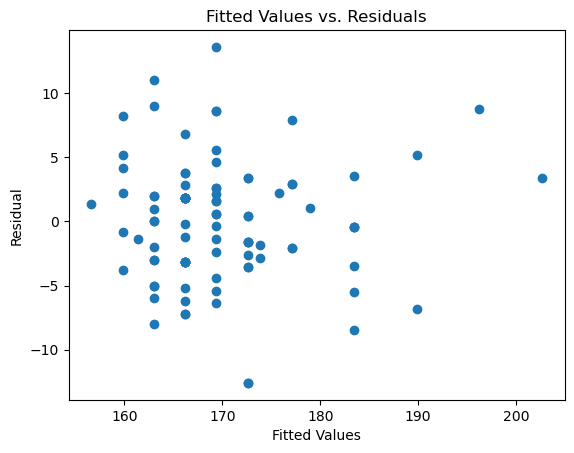

In [ ]:
p = model_t.fittedvalues
res = model_t.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [ ]:
df_p = pd.DataFrame({'sex':['man'], 'shoe_size':[42.0]})
df_p

,sex,shoe_size
0,man,42.0


In [ ]:
predictions = model_t.get_prediction(df_p)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,177.071863,1.280927,174.527833,179.615894,167.180108,186.963619
